# Correlation Analysis - Euclidean Distance

This notebook calculates the Euclidean distance between the stragety plans and between the QS rankings. Then the Spearman correlation is evaluated.

In [32]:
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

csv_filename = "path/to/Merged_Data_with_Frequencies.csv"
topics_filename = "path/to/final_file_bow.csv"

In [37]:
df_topics = pd.read_csv(topics_filename)
df_topics = df_topics.rename(columns={"Name" : "institution",
                                      "feature_1" : "ELDA_topic_0",
                                      "feature_2" : "ELDA_topic_1",
                                      "feature_3" : "ELDA_topic_2",
                                      "feature_4" : "ELDA_topic_3",
                                      "feature_5" : "ELDA_topic_4",
                                      "feature_6" : "ELDA_topic_5",
                                      "feature_7" : "ELDA_topic_6",
                                      "feature_8" : "ELDA_topic_7",
                                      "feature_9" : "ELDA_topic_8",
                                      "feature_10" : "ELDA_topic_9"})
df_topics = df_topics.drop(columns=["rank"])

topic_cols = list(df_topics.drop(columns=["institution"]).columns)

df = pd.read_csv(csv_filename)
df = df.rename(columns={"institution_x" : "institution",
                        "focus_x" : "focus"})

# Join n-gram features and topic features
df = df_topics.merge(df, on="institution", how="outer")

meta_cols = ["qs_ranking", "institution", "focus", "location", "continent", "year_established", "private_public", "type", 
             "strategy_start", "strategy_end", "filename", "pdf"]

df_ngrams = df.drop(columns = meta_cols)
unigram_cols = np.array(df_ngrams.columns)[[len(i) == 1 for i in df_ngrams.columns.str.split(' ')]]
bigram_cols = np.array(df_ngrams.columns)[[len(i) > 1 for i in df_ngrams.columns.str.split(' ')]]

## Uni- and Bi-Grams Combined

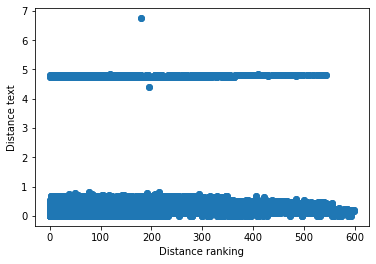

Correlation coefficient: -0.02254769475789709
p-value: 1.1621979200521818e-08


In [40]:
# Calculate distances
distance_text = euclidean_distances(df.drop(columns = meta_cols+topic_cols))
distance_rank = euclidean_distances(np.reshape(df["qs_ranking"], (-1, 1)))

# Plot data points
plt.scatter(distance_rank.flatten(), distance_text.flatten())
plt.xlabel("Distance ranking")
plt.ylabel("Distance text")
plt.show()
plt.savefig(

res = spearmanr(distance_rank.flatten(), distance_text.flatten())
print("Correlation coefficient: " + str(res.statistic))
print("p-value: " + str(res.pvalue))

While the p-value is <0.05, the coefficient is low which doesn't suggest that there is a strong relationship. This is reflected in the plot.

## Uni-Gram Only

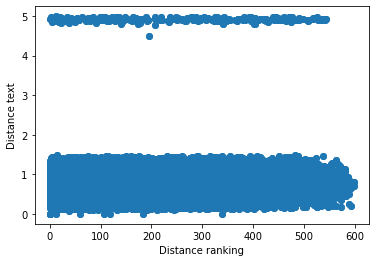

Correlation coefficient: -0.0005806085004954342
p-value: 0.8832179813431541


In [41]:
# Calculate distances
distance_text = euclidean_distances(df[unigram_cols])
distance_rank = euclidean_distances(np.reshape(df["qs_ranking"], (-1, 1)))

# Plot data points
plt.scatter(distance_rank.flatten(), distance_text.flatten())
plt.xlabel("Distance ranking")
plt.ylabel("Distance text")
plt.show()

res = spearmanr(distance_rank.flatten(), distance_text.flatten())
print("Correlation coefficient: " + str(res.statistic))
print("p-value: " + str(res.pvalue))

## Bi-Grams Only

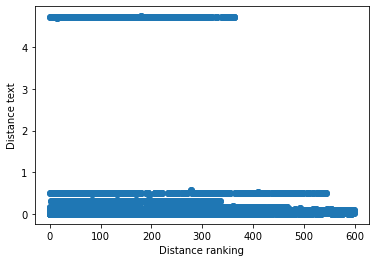

Correlation coefficient: -0.009994840449779456
p-value: 0.011448309628999662


In [42]:
# Calculate distances
distance_text = euclidean_distances(df[bigram_cols])
distance_rank = euclidean_distances(np.reshape(df["qs_ranking"], (-1, 1)))

# Plot data points
plt.scatter(distance_rank.flatten(), distance_text.flatten())
plt.xlabel("Distance ranking")
plt.ylabel("Distance text")
plt.show()

res = spearmanr(distance_rank.flatten(), distance_text.flatten())
print("Correlation coefficient: " + str(res.statistic))
print("p-value: " + str(res.pvalue))

## Combining n-Gram Features and Topic Features

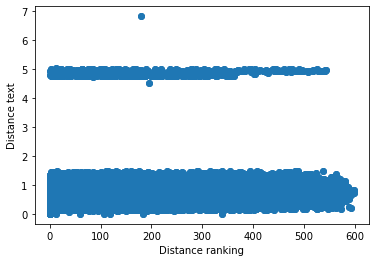

Correlation coefficient: -0.004675843289084824
p-value: 0.2368203571027172


In [43]:
# Calculate distances
distance_text = euclidean_distances(df.drop(columns = meta_cols))
distance_rank = euclidean_distances(np.reshape(df["qs_ranking"], (-1, 1)))

# Plot data points
plt.scatter(distance_rank.flatten(), distance_text.flatten())
plt.xlabel("Distance ranking")
plt.ylabel("Distance text")
plt.show()

res = spearmanr(distance_rank.flatten(), distance_text.flatten())
print("Correlation coefficient: " + str(res.statistic))
print("p-value: " + str(res.pvalue))

## Topics Only

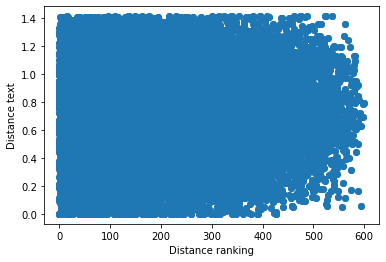

Correlation coefficient: 0.003483844425277412
p-value: 0.37810238503876903


In [44]:
# Calculate distances
distance_text = euclidean_distances(df[topic_cols])
distance_rank = euclidean_distances(np.reshape(df["qs_ranking"], (-1, 1)))

# Plot data points
plt.scatter(distance_rank.flatten(), distance_text.flatten())
plt.xlabel("Distance ranking")
plt.ylabel("Distance text")
plt.show()

res = spearmanr(distance_rank.flatten(), distance_text.flatten())
print("Correlation coefficient: " + str(res.statistic))
print("p-value: " + str(res.pvalue))